In [4]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r"C:\Users\Georg\Downloads\movies.csv.zip")

In [54]:
# Lets look at the data

df.head()

name  rating  genre  year released  score      votes  director  writer  \
0  6587       6      6  1980       16    8.4   927000.0      2589    4014   
1  5573       6      1  1980       20    5.8    65000.0      2269    1632   
2  5142       4      0  1980       17    8.7  1200000.0      1111    2567   
3   286       4      4  1980       20    7.7   221000.0      1301    2000   
4  1027       6      4  1980       24    7.3   108000.0      1054     521   

   star  country    budget      gross  company  runtime yearcorrect  
0  1047       54  19000000   46998772     2319    146.0         NaN  
1   327       55   4500000   58853106      731    104.0         NaN  
2  1745       55  18000000  538375067     1540    124.0         NaN  
3  2246       55   3500000   83453539     1812     88.0         NaN  
4   410       55   6000000   39846344     1777     98.0         NaN

In [7]:
# Checking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [8]:
# Data Types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [12]:
# changing data type 

df['gross'] = df['gross'].fillna(0).astype('int64')
df['budget'] = df['budget'].fillna(0).astype('int64')

In [53]:
df.head()

name  rating  genre  year released  score      votes  director  writer  \
0  6587       6      6  1980       16    8.4   927000.0      2589    4014   
1  5573       6      1  1980       20    5.8    65000.0      2269    1632   
2  5142       4      0  1980       17    8.7  1200000.0      1111    2567   
3   286       4      4  1980       20    7.7   221000.0      1301    2000   
4  1027       6      4  1980       24    7.3   108000.0      1054     521   

   star  country    budget      gross  company  runtime yearcorrect  
0  1047       54  19000000   46998772     2319    146.0         NaN  
1   327       55   4500000   58853106      731    104.0         NaN  
2  1745       55  18000000  538375067     1540    124.0         NaN  
3  2246       55   3500000   83453539     1812     88.0         NaN  
4   410       55   6000000   39846344     1777     98.0         NaN

In [51]:
# creating new columns for correct date released

df['released'] = df['released'].astype(str)

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})')

df.head()

name  rating  genre  year released  score      votes  director  writer  \
0  6587       6      6  1980       16    8.4   927000.0      2589    4014   
1  5573       6      1  1980       20    5.8    65000.0      2269    1632   
2  5142       4      0  1980       17    8.7  1200000.0      1111    2567   
3   286       4      4  1980       20    7.7   221000.0      1301    2000   
4  1027       6      4  1980       24    7.3   108000.0      1054     521   

   star  country    budget      gross  company  runtime yearcorrect  
0  1047       54  19000000   46998772     2319    146.0         NaN  
1   327       55   4500000   58853106      731    104.0         NaN  
2  1745       55  18000000  538375067     1540    124.0         NaN  
3  2246       55   3500000   83453539     1812     88.0         NaN  
4   410       55   6000000   39846344     1777     98.0         NaN

In [23]:
df.sort_values(by=['gross'], inplace =False, ascending=False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

In [21]:
pd.set_option('display.max_rows' , None)

In [25]:
# drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [55]:
df.head()

name  rating  genre  year released  score      votes  director  writer  \
0  6587       6      6  1980       16    8.4   927000.0      2589    4014   
1  5573       6      1  1980       20    5.8    65000.0      2269    1632   
2  5142       4      0  1980       17    8.7  1200000.0      1111    2567   
3   286       4      4  1980       20    7.7   221000.0      1301    2000   
4  1027       6      4  1980       24    7.3   108000.0      1054     521   

   star  country    budget      gross  company  runtime yearcorrect  
0  1047       54  19000000   46998772     2319    146.0         NaN  
1   327       55   4500000   58853106      731    104.0         NaN  
2  1745       55  18000000  538375067     1540    124.0         NaN  
3  2246       55   3500000   83453539     1812     88.0         NaN  
4   410       55   6000000   39846344     1777     98.0         NaN

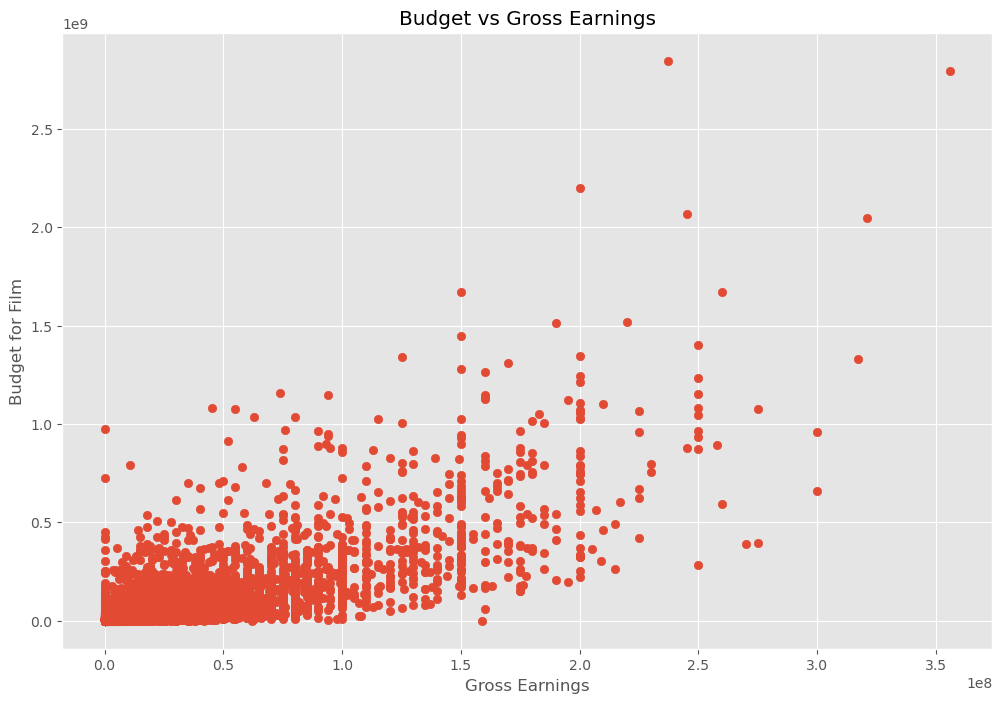

In [30]:
# scatter plot with budget vs gross revenue


plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()


In [52]:
df.head()

name  rating  genre  year released  score      votes  director  writer  \
0  6587       6      6  1980       16    8.4   927000.0      2589    4014   
1  5573       6      1  1980       20    5.8    65000.0      2269    1632   
2  5142       4      0  1980       17    8.7  1200000.0      1111    2567   
3   286       4      4  1980       20    7.7   221000.0      1301    2000   
4  1027       6      4  1980       24    7.3   108000.0      1054     521   

   star  country    budget      gross  company  runtime yearcorrect  
0  1047       54  19000000   46998772     2319    146.0         NaN  
1   327       55   4500000   58853106      731    104.0         NaN  
2  1745       55  18000000  538375067     1540    124.0         NaN  
3  2246       55   3500000   83453539     1812     88.0         NaN  
4   410       55   6000000   39846344     1777     98.0         NaN

<Axes: xlabel='budget', ylabel='gross'>

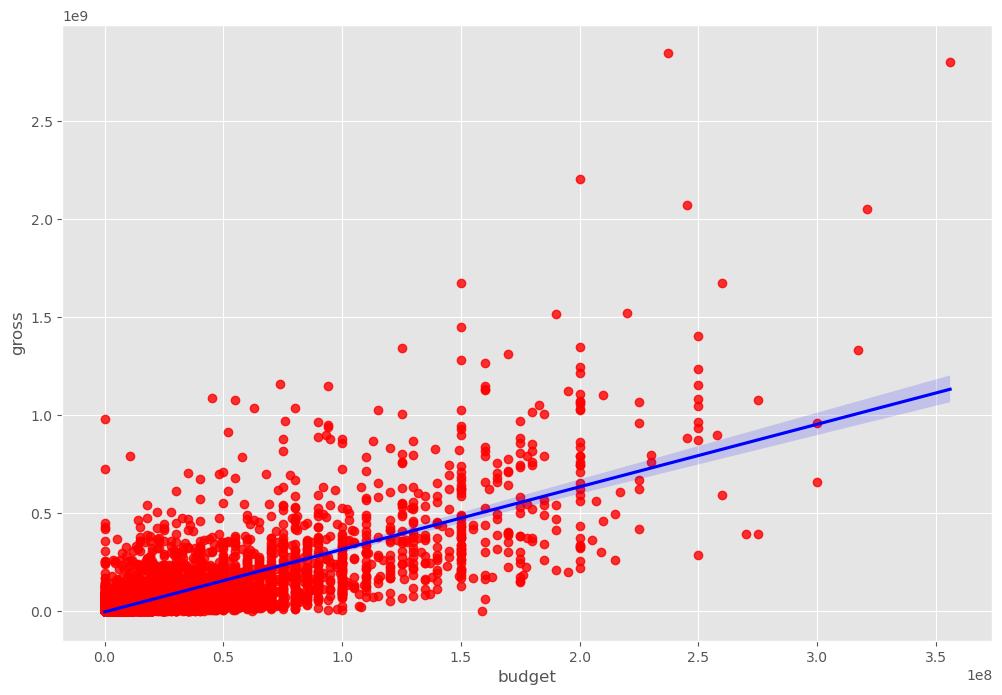

In [36]:
# Plot the budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})



In [37]:
# correlation

df.corr()

C:\Users\Georg\AppData\Local\Temp\ipykernel_10936\3331285605.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000

In [39]:
df.corr(method='pearson')

C:\Users\Georg\AppData\Local\Temp\ipykernel_10936\1928163937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000

C:\Users\Georg\AppData\Local\Temp\ipykernel_10936\3072408962.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


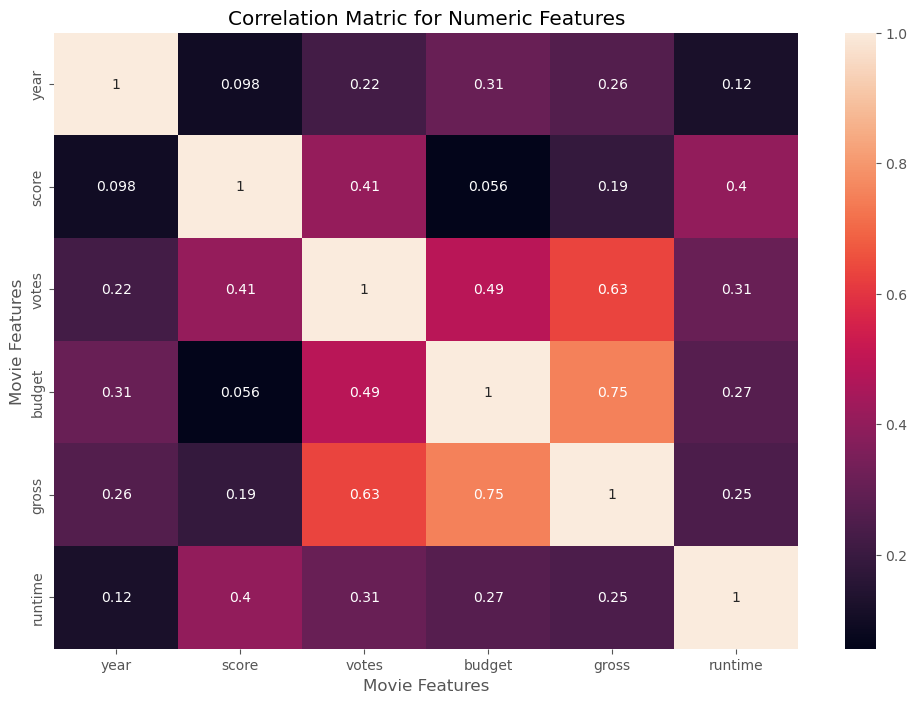

In [42]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()



In [56]:
# looking at company

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       6      6  1980       668    8.4   927000.0      2589    4014   
1  5573       6      1  1980      1113    5.8    65000.0      2269    1632   
2  5142       4      0  1980       779    8.7  1200000.0      1111    2567   
3   286       4      4  1980      1113    7.7   221000.0      1301    2000   
4  1027       6      4  1980      1557    7.3   108000.0      1054     521   

   star  country    budget      gross  company  runtime  yearcorrect  
0  1047       54  19000000   46998772     2319    146.0           -1  
1   327       55   4500000   58853106      731    104.0           -1  
2  1745       55  18000000  538375067     1540    124.0           -1  
3  2246       55   3500000   83453539     1812     88.0           -1  
4   410       55   6000000   39846344     1777     98.0           -1

In [57]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       6      6  1980       668    8.4   927000.0      2589    4014   
1  5573       6      1  1980      1113    5.8    65000.0      2269    1632   
2  5142       4      0  1980       779    8.7  1200000.0      1111    2567   
3   286       4      4  1980      1113    7.7   221000.0      1301    2000   
4  1027       6      4  1980      1557    7.3   108000.0      1054     521   

   star  country    budget      gross  company  runtime  yearcorrect  
0  1047       54  19000000   46998772     2319    146.0           -1  
1   327       55   4500000   58853106      731    104.0           -1  
2  1745       55  18000000  538375067     1540    124.0           -1  
3  2246       55   3500000   83453539     1812     88.0           -1  
4   410       55   6000000   39846344     1777     98.0           -1

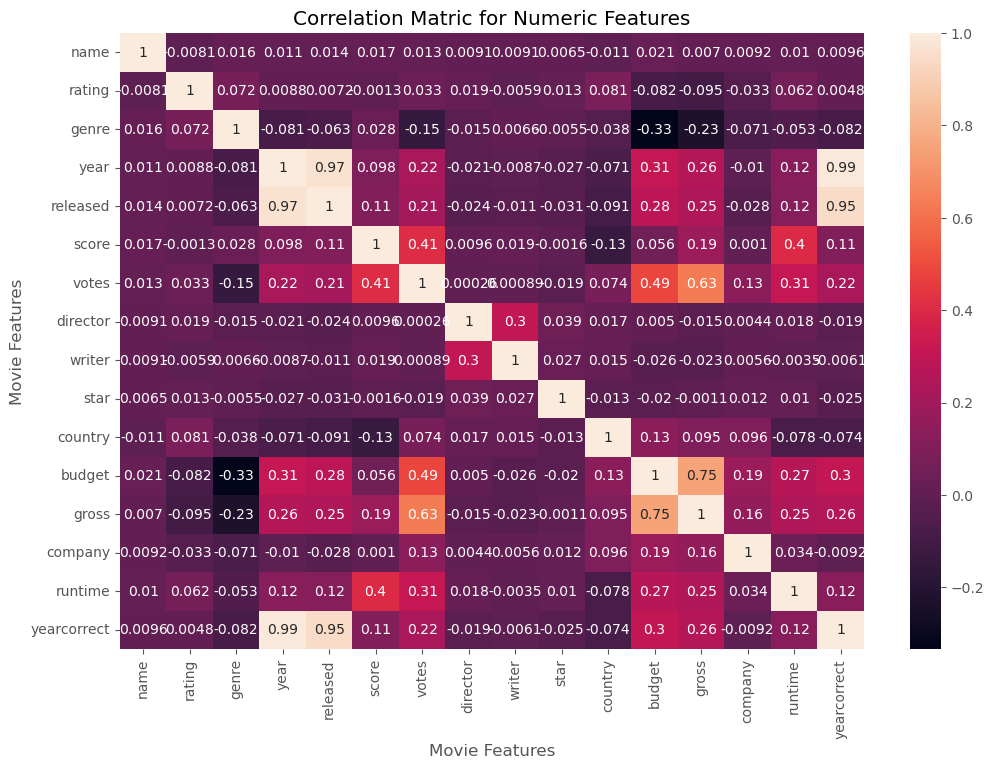

In [45]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()


In [46]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.008069  0.016355  0.011453  0.013555  0.017097   
rating      -0.008069  1.000000  0.072423  0.008779  0.007211 -0.001314   
genre        0.016355  0.072423  1.000000 -0.081261 -0.063324  0.027965   
year         0.011453  0.008779 -0.081261  1.000000  0.968021  0.097995   
released     0.013555  0.007211 -0.063324  0.968021  1.000000  0.108470   
score        0.017097 -0.001314  0.027965  0.097995  0.108470  1.000000   
votes        0.013088  0.033225 -0.145307  0.222945  0.206278  0.409182   
director     0.009079  0.019483 -0.015258 -0.020795 -0.023525  0.009559   
writer       0.009081 -0.005921  0.006567 -0.008656 -0.010961  0.019416   
star         0.006472  0.013405 -0.005477 -0.027242 -0.030914 -0.001609   
country     -0.010737  0.081244 -0.037615 -0.070938 -0.090955 -0.133348   
budget       0.020548 -0.081939 -0.334021  0.309212  0.284625  0.055665   
gross        0.006989 -0.095450 -0.234297  0.261900  0.245716  0.186392   
company      0.009211 -0.032943 -0.071067 -0.010431 -0.027825  0.001030   
runtime      0.010392  0.062145 -0.052711  0.120811  0.117937  0.399451   
yearcorrect  0.009553  0.004829 -0.082070  0.992136  0.947404  0.105341   

                votes  director    writer      star   country    budget  \
name         0.013088  0.009079  0.009081  0.006472 -0.010737  0.020548   
rating       0.033225  0.019483 -0.005921  0.013405  0.081244 -0.081939   
genre       -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.334021   
year         0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.309212   
released     0.206278 -0.023525 -0.010961 -0.030914 -0.090955  0.284625   
score        0.409182  0.009559  0.019416 -0.001609 -0.133348  0.055665   
votes        1.000000  0.000260  0.000892 -0.019282  0.073625  0.486862   
director     0.000260  1.000000  0.299067  0.039234  0.017490  0.004976   
writer       0.000892  0.299067  1.000000  0.027245  0.015343 -0.025911   
star        -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.019952   
country      0.073625  0.017490  0.015343 -0.012998  1.000000  0.131720   
budget       0.486862  0.004976 -0.025911 -0.019952  0.131720  1.000000   
gross        0.632834 -0.014916 -0.022997 -0.001129  0.095325  0.750157   
company      0.133204  0.004404  0.005646  0.012442  0.095548  0.186474   
runtime      0.309212  0.017624 -0.003511  0.010174 -0.078412  0.269510   
yearcorrect  0.219954 -0.018620 -0.006134 -0.025288 -0.074166  0.302266   

                gross   company   runtime  yearcorrect  
name         0.006989  0.009211  0.010392     0.009553  
rating      -0.095450 -0.032943  0.062145     0.004829  
genre       -0.234297 -0.071067 -0.052711    -0.082070  
year         0.261900 -0.010431  0.120811     0.992136  
released     0.245716 -0.027825  0.117937     0.947404  
score        0.186392  0.001030  0.399451     0.105341  
votes        0.632834  0.133204  0.309212     0.219954  
director    -0.014916  0.004404  0.017624    -0.018620  
writer      -0.022997  0.005646 -0.003511    -0.006134  
star        -0.001129  0.012442  0.010174    -0.025288  
country      0.095325  0.095548 -0.078412    -0.074166  
budget       0.750157  0.186474  0.269510     0.302266  
gross        1.000000  0.156745  0.245235     0.256266  
company      0.156745  1.000000  0.034402    -0.009185  
runtime      0.245235  0.034402  1.000000     0.121534  
yearcorrect  0.256266 -0.009185  0.121534     1.000000

In [47]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released       0.013555
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.010392
             yearcorrect    0.009553
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.007211
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [48]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
genre        gross         -0.234297
gross        genre         -0.234297
genre        votes         -0.145307
votes        genre         -0.145307
score        country       -0.133348
country      score         -0.133348
gross        rating        -0.095450
rating       gross         -0.095450
released     country       -0.090955
country      released      -0.090955
genre        yearcorrect   -0.082070
yearcorrect  genre         -0.082070
rating       budget        -0.081939
budget       rating        -0.081939
genre        year          -0.081261
year         genre         -0.081261
country      runtime       -0.078412
runtime      country       -0.078412
country      yearcorrect   -0.074166
yearcorrect  country       -0.074166
genre        company       -0.071067
company      genre         -0.071067
year         country       -0.070938
country      year          -0.070938
genre        released      -0.063324
r

In [50]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes        gross          0.632834
gross        votes          0.632834
             budget         0.750157
budget       gross          0.750157
released     yearcorrect    0.947404
yearcorrect  released       0.947404
year         released       0.968021
released     year           0.968021
year         yearcorrect    0.992136
yearcorrect  year           0.992136
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# votes and budget have the highest correlations to gross earnings

# company has low correlation